In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
energies = {}
methods = ["binary", "ohe", "unary", "domain_wall"]

for method in methods:

    # iterate over different size
    for filename in os.listdir(f"{method}/"):
        if filename.startswith("solutions_"):

            # load the data
            data = np.load(f"{method}/{filename}", allow_pickle=True)
            
            # iterate over each trial which has different penalty weights
            for trial in data:


                # extract the penalty weights
                weights = tuple(trial["penalty_weights"].values())
                

                # extract the solutions
                solutions = trial["solutions"]

                energy_array = []

                for sample in solutions:
                    # extract the energy
                    energy = sample["energy"]

                    # store the energy
                    energy_array.append(energy)

                if method in list(energies.keys()):
                    if filename in list(energies[method].keys()):
                        # if the filename already exists, append the energy array
                        energies[method][filename].setdefault(weights, energy_array)
                    else:
                        # if the filename does not exist, create a new entry
                        energies[method].setdefault(filename, {weights: energy_array})
                else:
                    energies.setdefault(method, {filename: {weights: energy_array}})
                    

## Select the top 10 best performing penalty weight combos

In [4]:
# select 10 best penalty pairings
energies_sorted = {}

for method in list(energies.keys()):
    for filename in list(energies[method].keys()):
        
        # sort the energy values by the minimum energy produced
        energies_new = sorted(energies[method][filename], key=lambda x: np.mean(energies[method][filename][x]))[:10]
        print(energies_new)

        # add the found penalty pairings to the sorted dictionary
        for i in energies_new:
            if method in list(energies_sorted.keys()):
                if filename in list(energies_sorted[method].keys()):
                    # if the filename already exists, append the energy array
                    energies_sorted[method][filename].setdefault(i, energies[method][filename][i])
                else:
                    # if the filename does not exist, create a new entry
                    energies_sorted[method].setdefault(filename, {i: energies[method][filename][i]})
            else:
                # if the filename does not exist, create a new entry
                energies_sorted.setdefault(method, {filename: {i: energies[method][filename][i]}})

[(1, 1, 1), (1, 2, 1), (1, 2, 2), (1, 1, 2), (1, 3, 3), (1, 1, 3), (1, 2, 3), (1, 1, 4), (1, 4, 3), (1, 3, 2)]
[(1, 1, 1), (1, 1, 2), (1, 2, 4), (1, 3, 4), (1, 1, 4), (1, 2, 1), (1, 2, 3), (1, 3, 3), (1, 4, 4), (1, 1, 3)]
[(1, 1, 1), (1, 2, 4), (1, 1, 2), (1, 2, 1), (1, 2, 3), (1, 3, 4), (1, 2, 2), (1, 1, 4), (1, 3, 2), (1, 4, 3)]
[(4, 4, 1, 1), (4, 3, 1, 1), (3, 4, 1, 1), (2, 3, 1, 1), (3, 3, 1, 1), (1, 3, 1, 1), (4, 2, 1, 1), (2, 4, 1, 1), (1, 4, 1, 1), (2, 2, 1, 1)]
[(1, 4, 1, 1), (3, 3, 1, 1), (1, 2, 1, 1), (1, 1, 1, 1), (2, 2, 1, 1), (1, 3, 1, 1), (2, 1, 1, 1), (2, 4, 1, 2), (3, 2, 1, 1), (2, 3, 1, 1)]
[(4, 4, 1, 1), (2, 4, 1, 1), (3, 4, 1, 1), (4, 3, 1, 1), (4, 2, 1, 1), (1, 4, 1, 1), (3, 3, 1, 1), (1, 3, 1, 1), (2, 3, 1, 1), (1, 1, 1, 1)]
[(4, 4, 2, 1), (4, 4, 3, 1), (3, 4, 1, 1), (3, 4, 3, 2), (4, 4, 4, 1), (4, 4, 1, 1), (3, 4, 2, 1), (3, 4, 4, 1), (4, 3, 1, 1), (2, 4, 1, 1)]
[(1, 4, 1, 1), (2, 3, 1, 1), (3, 3, 1, 1), (2, 2, 1, 1), (3, 2, 1, 1), (3, 4, 1, 1), (2, 4, 1, 1), (2, 

In [5]:
energies_sorted["binary"].keys()

dict_keys(['solutions_4.npy', 'solutions_3.npy', 'solutions_5.npy'])

## Plot the best performers in a violin plot

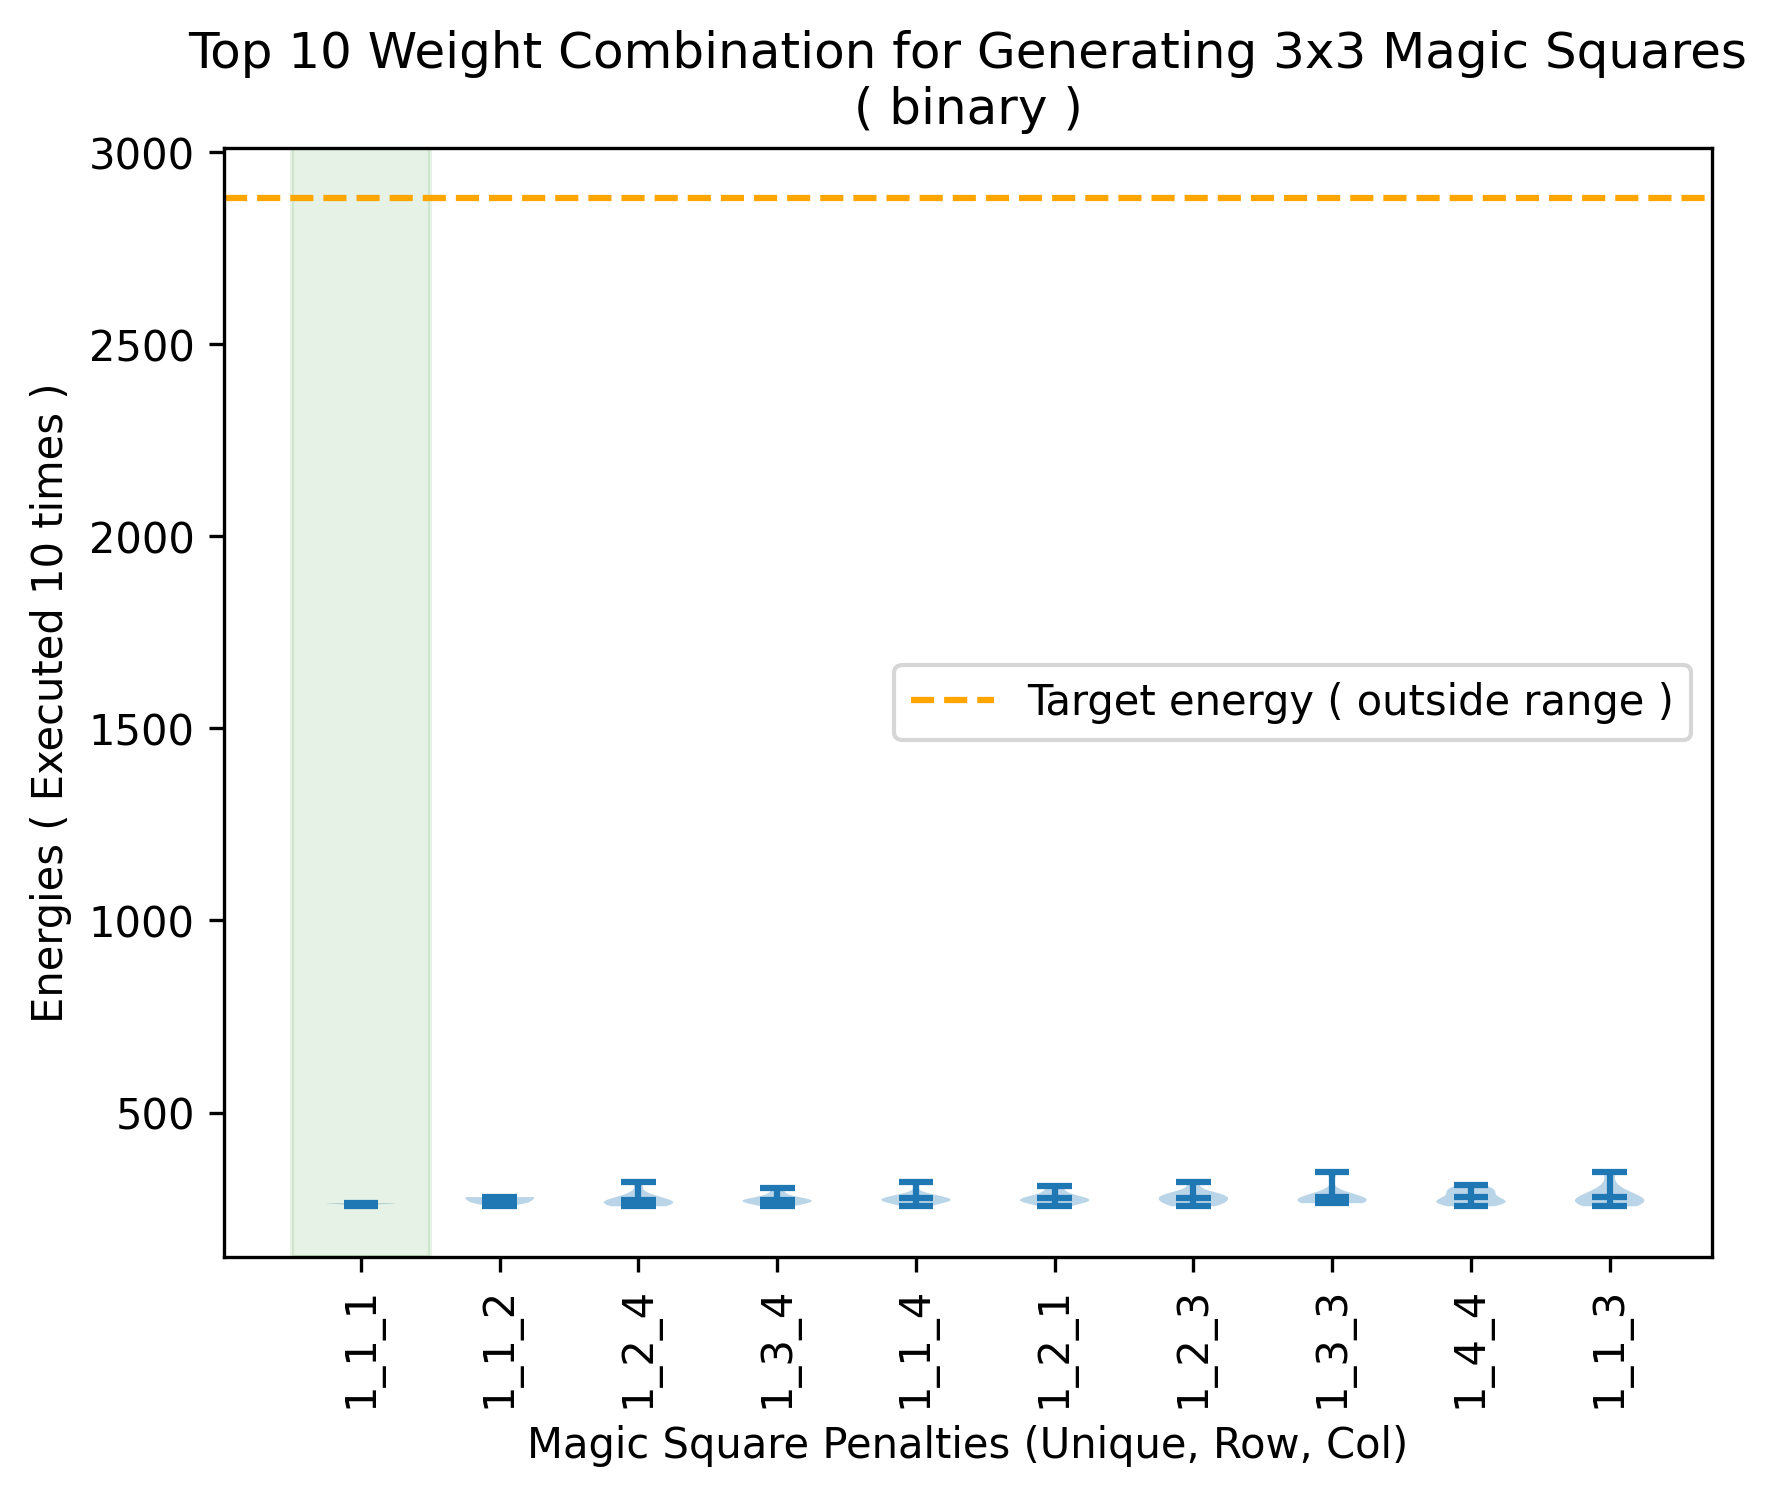

In [ ]:

for order in range(3, 6):

    method = "binary"
    filename = f"solutions_{order}.npy"

    data = np.load(f"{method}/{filename}", allow_pickle=True)
    number_of_trials = data[0]["samples"]
    
    plt.figure(dpi=300)
    plt.title(f"Top 10 Weight Combination for Generating {order}x{order} Magic Squares\n( {method} )")
    plt.xlabel("Magic Square Penalties (Unique, Row, Col)")
    plt.ylabel(f"Energies ( Executed {number_of_trials} times )")

    # show a red dotted horizontal line at 0
    # plt.axhline(0, color='red', linestyle='--', label="Target energy ( in range )")
    plt.axhline(2880, color='orange', linestyle='--', label="Target energy ( outside range )")

    # extract the data and positions for the violin plot
    data = list(energies_sorted[method][filename].values())

    if method == "binary":
        positions = list(map(lambda x: f"{x[0]}_{x[1]}_{x[2]}", energies_sorted[method][filename].keys()))
    else:
        positions = list(map(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}", energies_sorted[method][filename].keys()))

    # create the violin plot
    plt.violinplot(data, positions=[i for i in range(10)], showmeans=True)
    plt.xticks([i for i in range(len(energies_sorted[method][filename].keys()))], positions, rotation=90)
    plt.axvspan(-0.5, 0.5, color='green', alpha=0.1)

    plt.legend()
    
    # plt.show()
    plt.savefig(f"test_{order}", bbox_inches="tight")

## Perform 5000 run analysis

In [ ]:

d = np.load("ohe/5000_solutions_3.npy", allow_pickle=True).item()["solutions"]

# now get all energy values of this dictionary in one line
energy_array = [int(i["energy"]) for i in d]



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,


<>:17: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
/tmp/ipykernel_40471/1093518202.py:17: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if method is not "binary":


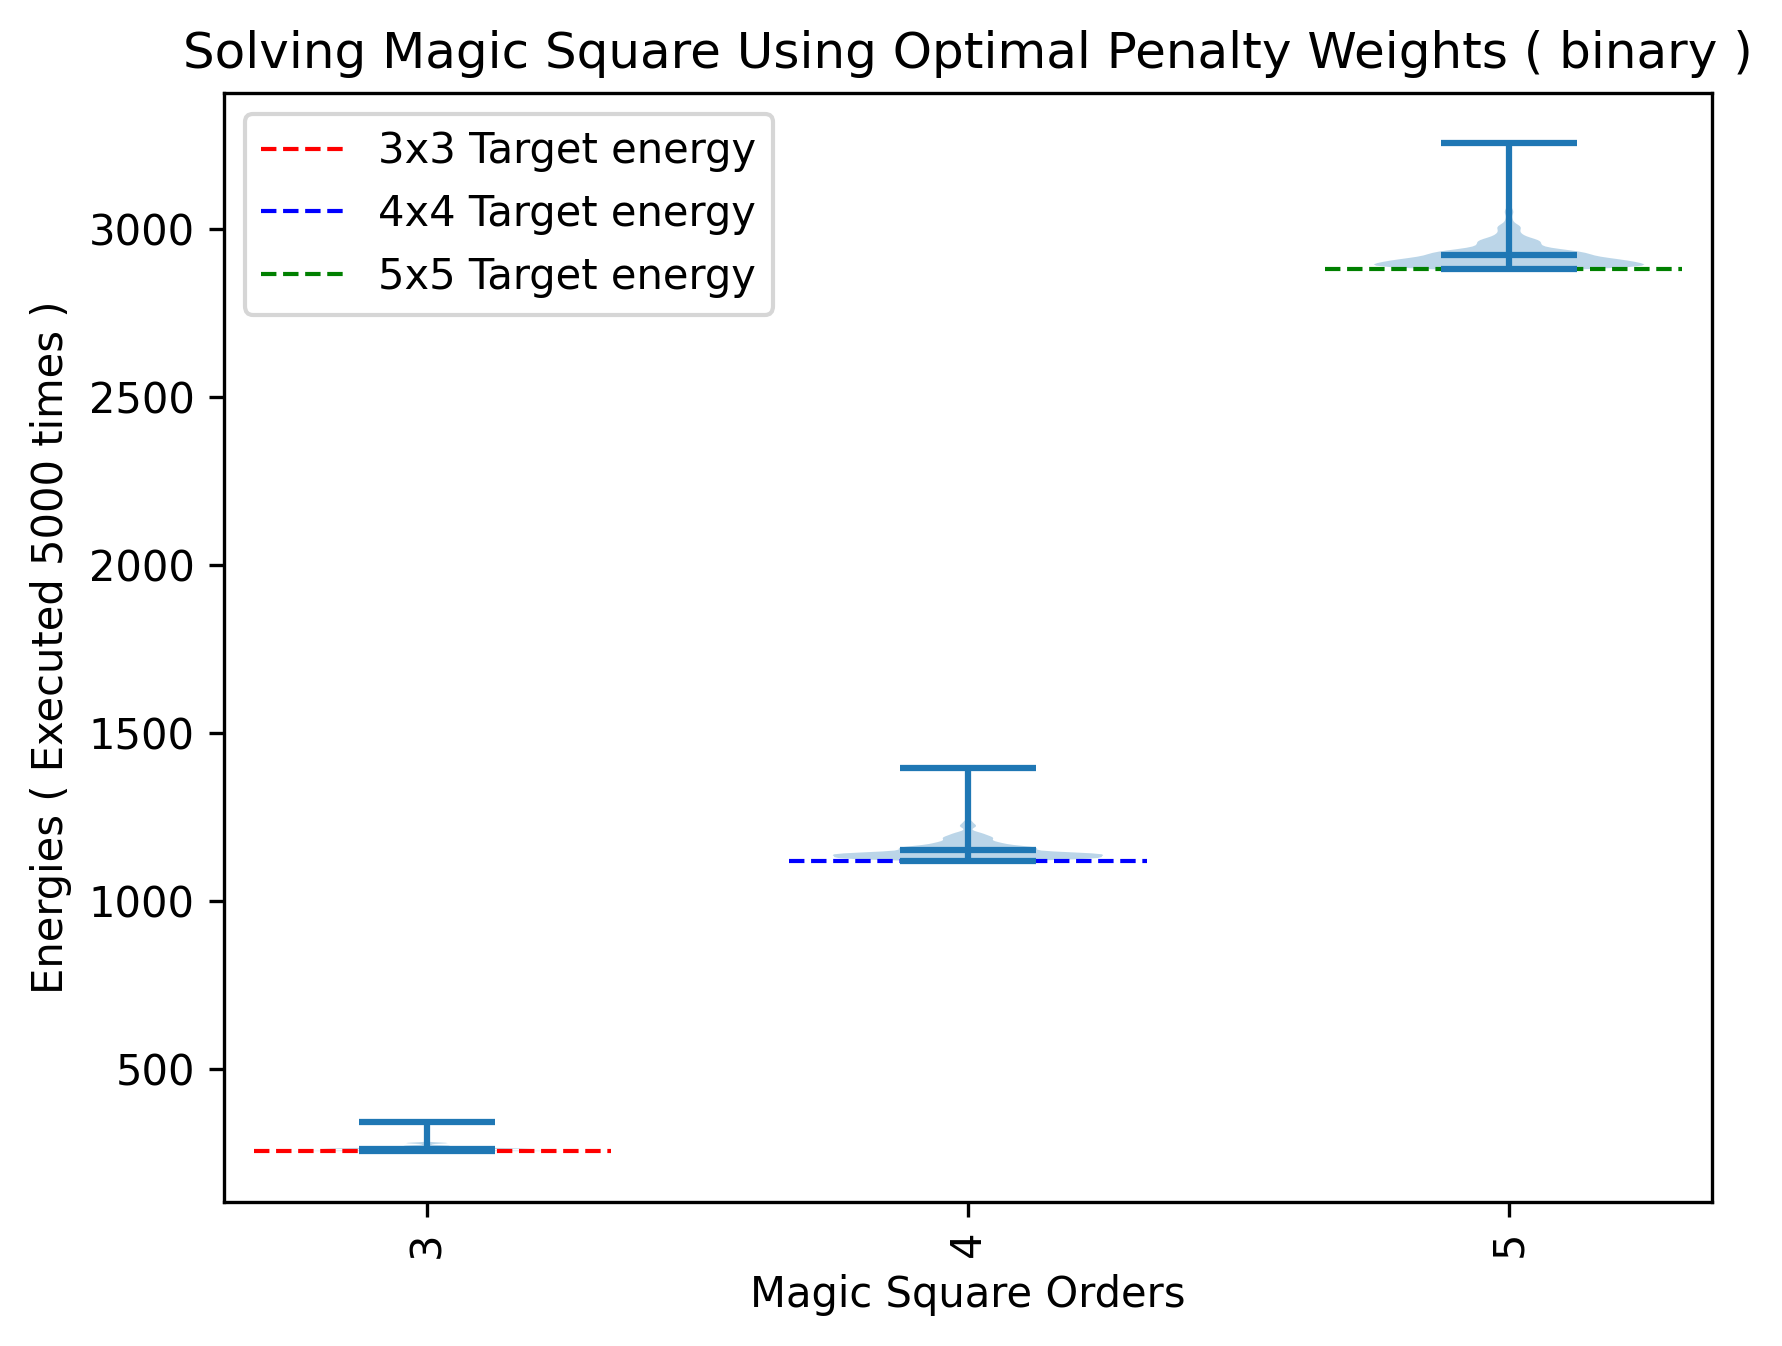

In [7]:

energies = []
positions = []

for order in range(3, 6):
    method = "binary"

    data = np.load(f"{method}/5000_solutions_{order}.npy", allow_pickle=True).item()
    energies.append([int(i["energy"]) for i in data["solutions"]])
    positions.append(order)

plt.figure(dpi=300)
plt.title(f"Solving Magic Square Using Optimal Penalty Weights ( {method} )")
plt.xlabel("Magic Square Orders")
plt.ylabel(f"Energies ( Executed 5000 times )")

# show a red dotted horizontal line at 0
if method is not "binary":
    plt.axhline(0, color='red', linestyle='--', label="Target energy", lw=1)
else:
    plt.axhline(256, xmin=0.02, xmax=0.26, color='red', linestyle='--', label="3x3 Target energy", lw=1)
    plt.axhline(1120, xmin=0.38, xmax=0.62, color='blue', linestyle='--', label="4x4 Target energy", lw=1)
    plt.axhline(2880, xmin=0.74, xmax=0.98, color='green', linestyle='--', label="5x5 Target energy", lw=1)

# create the violin plot
plt.violinplot(energies, positions=positions, showmeans=True)
plt.xticks(positions, positions, rotation=90)

plt.legend()

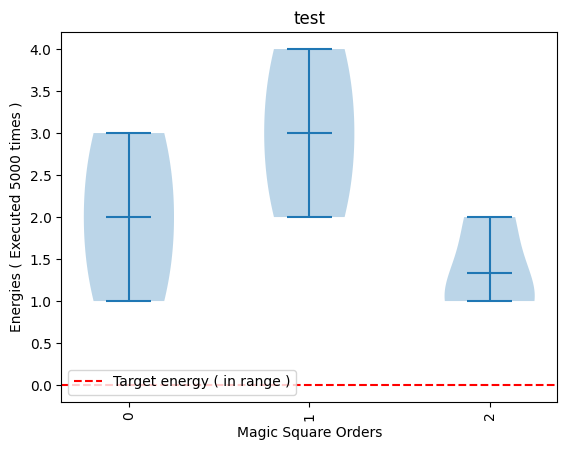

In [28]:
plt.title(f"test")
plt.xlabel("Magic Square Orders")
plt.ylabel(f"Energies ( Executed 5000 times )")

# show a red dotted horizontal line at 0
plt.axhline(0, color='red', linestyle='--', label="Target energy ( in range )")

# create the violin plot
plt.violinplot([[1, 2, 3], [2, 3, 4], [1, 1, 2]], positions=[i for i in range(3)], showmeans=True)
plt.xticks([i for i in range(3)], [i for i in range(3)], rotation=90)

plt.legend()